#  Pengenalan Big Data dan Overview Teknologi

### Untuk langkah-langkah Instalasi Anaconda dapat dilihat di link berikut :
https://github.com/diazgilmour/University/blob/main/Praktikum%20Big%20Data/Langkah%20Penginstallan%20Anaconda.pdf



# Tugas 1 : Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [1]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Memancing", "Laki-Laki", "Ojek"), ("Budi", 23, "Boxing", "Laki-Laki", "Penyanyi"), ("Citra", 29, "Ngevlog", "Perempuan", "Mekanik"), ("Dina", 45, "Berdandan", "Perempuan", "Vlogger")]
columns = ["Nama", "Usia", "Hobi", "Gender", "Pekerjaan"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+---------+---------+---------+
| Nama|Usia|     Hobi|   Gender|Pekerjaan|
+-----+----+---------+---------+---------+
|  Ali|  34|Memancing|Laki-Laki|     Ojek|
| Budi|  23|   Boxing|Laki-Laki| Penyanyi|
|Citra|  29|  Ngevlog|Perempuan|  Mekanik|
| Dina|  45|Berdandan|Perempuan|  Vlogger|
+-----+----+---------+---------+---------+



### Penjelasan Tugas 1: Pada dataframe yang sudah ada saya menambahkan data dan kolom baru pada baris 7 dan 8

# Tugas 2 : Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [3]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Mancing", "Laki-Laki"), ("Budi", 23, "Boxing", "Laki-Laki"), ("Citra", 29, "Ngevlog", "Perempuan"), ("Dina", 45, "Berdandan", "Perempuan")]
columns = ["Nama", "Usia", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Gender'] == "Laki-Laki")
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+-----+----+---------+---------+
| Nama|Usia|     Hobi|   Gender|
+-----+----+---------+---------+
|  Ali|  34|  Mancing|Laki-Laki|
| Budi|  23|   Boxing|Laki-Laki|
|Citra|  29|  Ngevlog|Perempuan|
| Dina|  45|Berdandan|Perempuan|
+-----+----+---------+---------+

+----+----+-------+---------+
|Nama|Usia|   Hobi|   Gender|
+----+----+-------+---------+
| Ali|  34|Mancing|Laki-Laki|
|Budi|  23| Boxing|Laki-Laki|
+----+----+-------+---------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+---------+---------+
| Nama|Usia|     Hobi|   Gender|
+-----+----+---------+---------+
| Dina|  45|Berdandan|Perempuan|
|  Ali|  34|  Mancing|Laki-Laki|
|Citra|  29|  Ngevlog|Perempuan|
| Budi|  23|   Boxing|Laki-Laki|
+-----+----+---------+---------+



### Penjelasan Tugas 2 : Pada baris ke 15 dan 16 saya menambahkan filtering data berdasarkan gender yaitu laki-laki, lalu pada baris ke 19 dan 20 adalah fungsi untuk menghitung rata-rata serta pada baris 23 dan 24 adalah untuk mengurutkan data berdasar usia

# Tugas 3 : Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [40]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

df_pandas["kota"] = ["Jakarta", "Bandung", "Magelang", "Sleman"]

filtered_df = df_pandas[df_pandas["Usia"] < 30]

# Menampilkan DataFrame Pandas
display(df_pandas)
display(filtered_df)




,Nama,Usia,kota
0,Ali,34,Jakarta
1,Budi,23,Bandung
2,Citra,29,Magelang
3,Dina,45,Sleman


,Nama,Usia,kota
1,Budi,23,Bandung
2,Citra,29,Magelang


### Penjelasan Tugas 3 : pada baris ke 7 saya menambahkan kolom dan data baru, kemudian untuk filtering pada baris ke 9 adalah untuk menampilkan data yang berusia dibawah 30 tahun

 #  Tugas 4 : Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

    Nama  Usia Pekerjaan
0    Ali    34      Ojek
1   Budi    23  Penyanyi
2  Citra    29   Mekanik
3   Dina    45   Vlogger
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


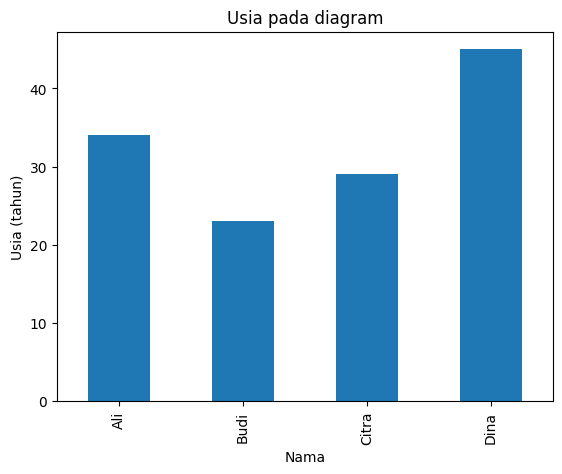

In [5]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Ojek", "Penyanyi", "Mekanik", "Vlogger"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt

# Plotting data dengan nama pada sumbu x
df_pandas.set_index('Nama')['Usia'].plot(kind='bar')

# Menambahkan judul dan label
plt.title("Usia pada diagram")
plt.xlabel("Nama")
plt.ylabel("Usia (tahun)")

# Menampilkan plot
plt.show()



### Penjelasan Tugas 4 : pada baris ke 4 dan 5 kita membuat dataframe pandas, lalu pada baris 8 dan 9 saya membuat dataframe kedua yang kemudian digabungkan pada baris 12 dan ditampilkan dengan baris ke 13, untuk memvisualisasikan data saya melakukan plotting data yang kemudian pada setiap sumbunya saya beri nama dan keterangan.

# Tugas 5 : Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

In [13]:
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34, "Laki-laki"), 
              ("Budi", 23, "Laki-laki"), 
              ("Citra", 29, "Perempuan"), 
              ("Dina", 45, "Perempuan")]
columns = ["Nama", "Usia", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Diaz", "Fitri"], "Usia": [21, 19], "Gender": ["Laki-laki", "Perempuan"]}
df_pandas = pd.DataFrame(data_pandas)

# Konversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Konversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menggabungkan data PySpark dan Pandas (setelah konversi ke PySpark)
df_combined = df_spark.unionByName(df_spark_from_pandas)
df_combined.show()

# Menghitung rata-rata usia
df_combined.groupBy().agg(avg("Usia")).show()


+-----+----+---------+
| Nama|Usia|   Gender|
+-----+----+---------+
|  Ali|  34|Laki-laki|
| Budi|  23|Laki-laki|
|Citra|  29|Perempuan|
| Dina|  45|Perempuan|
| Diaz|  21|Laki-laki|
|Fitri|  19|Perempuan|
+-----+----+---------+

+---------+
|avg(Usia)|
+---------+
|     28.5|
+---------+



### Penjelasan Tugas 5 : Dimulai dengan membuat dataframe pyspark dan dataframe pandas dengan satu kolom yang beda dan satu kolom yang sama maka akan dilakukan konversi dan penggabungan kedua dataframe tersebut yang kemudian akan dihitung rata-rata usianya 

# Tugas 6 : Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [14]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import max

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34, "Laki-laki"), 
              ("Budi", 23, "Laki-laki"), 
              ("Citra", 29, "Perempuan"), 
              ("Dina", 45, "Perempuan")]
columns = ["Nama", "Usia", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Diaz", "Fitri"], "Usia": [21, 19], "Gender": ["Laki-laki", "Perempuan"]}
df_pandas = pd.DataFrame(data_pandas)

# Konversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Konversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menggabungkan data PySpark dan Pandas (setelah konversi ke PySpark)
df_combined = df_spark.unionByName(df_spark_from_pandas)
df_combined.show()

# Menghitung nilai maksimum usia
df_combined.groupBy().agg(max("Usia")).show()


+-----+----+---------+
| Nama|Usia|   Gender|
+-----+----+---------+
|  Ali|  34|Laki-laki|
| Budi|  23|Laki-laki|
|Citra|  29|Perempuan|
| Dina|  45|Perempuan|
| Diaz|  21|Laki-laki|
|Fitri|  19|Perempuan|
+-----+----+---------+

+---------+
|max(Usia)|
+---------+
|       45|
+---------+



### Penjelasan Tugas 6 : Hanya merubah operasi menjadi menghitung nilai maksimum usia 
